# Monte Carlo simulation

We consider a simple demonstration of the Monte Carlo technique for finding the equilibrium state of a system at finite temperature.  The basic approach is:

* Evaluate the energy of the system
* Make a small change to the system (at random)
* Evaluate the change in energy, $\Delta E$
* If the energy goes down, accept the change
* If the energy goes up, accept the change with probability $p = \exp -\Delta E/kT$
* Repeat

The essential algorithm is relatively simple; implementing it normally involves two issues:

* Making the change to the system
* Evaluating the change in energy efficiently

## A simple model of sedimentation

We will demonstrate the approach using a very simple (and completely fictitious) model of sedimentation, where particles of different mass settle under the influence of gravity.  We consider a square array of sites (particles) with random masses, and explore the effect of swapping neighbouring particles with the same $x$ coordinate.  The gravitational potential energy will simply be taken to be $m_{i,j} y_{i,j}$ for a particle at $(x_{i,j}, y_{i,j})$ (though we will normally just set $x=i, y=j$).

To make the change, we will pick a point at random but exclude the maximum value of $j$; we will then evaluate the energy change when swapping the particle with the particle above it (i.e. at $j+1$).  The energy change is easily evaluated by just considering the two particles; we will also keep track of the total energy to understand the progress of the system towards equilibrium.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

# Sites
N = 20
# Maximum mass
max_m = 6
# Array of y positions
yvec = np.arange(N)

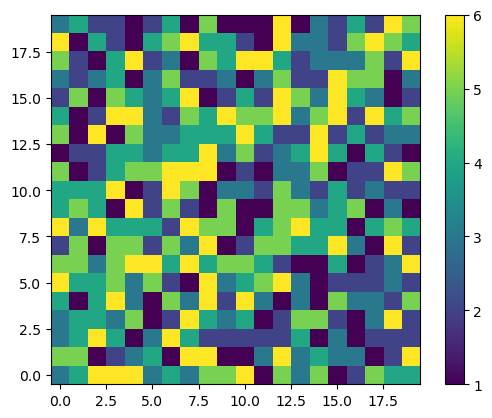

In [5]:
lattice1 = rng.integers(1,max_m+1,(N,N))
plt.imshow(lattice1,origin='lower')
plt.colorbar()

In [7]:
n_trials = 100000
kT1 = 5
energy1 = np.zeros(n_trials)
for t in range(n_trials):
    posx = rng.integers(0,N)
    posy = rng.integers(0,N-1)
    dE = lattice1[posx,posy+1]*posy + lattice1[posx,posy]*(posy+1) - (
        lattice1[posx,posy]*posy + lattice1[posx,posy+1]*(posy+1))
    p = np.exp(-dE/kT1)
    if dE<0.0 or rng.random()<p:
        tmp = lattice1[posx,posy+1]
        lattice1[posx,posy+1] = lattice1[posx,posy]
        lattice1[posx,posy] = tmp
    energy1[t] = np.sum(lattice1*yvec)

Text(0.5, 1.0, 'Final distribution for kT=5')

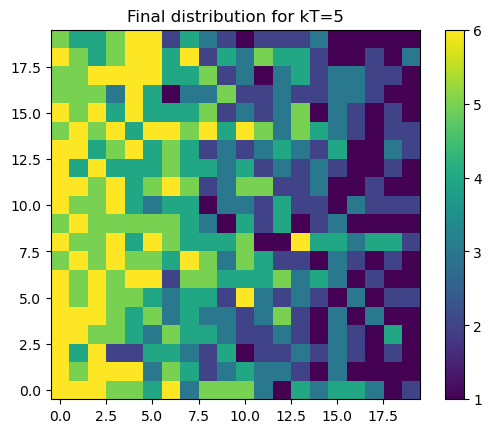

In [8]:
plt.imshow(lattice1,origin='lower')
plt.colorbar()
plt.title(f'Final distribution for kT={kT1}')

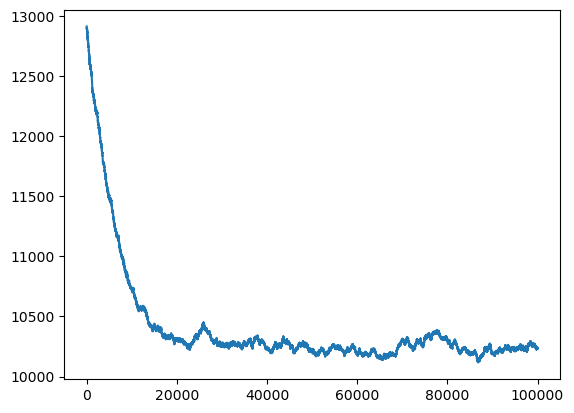

In [9]:
plt.plot(energy1)

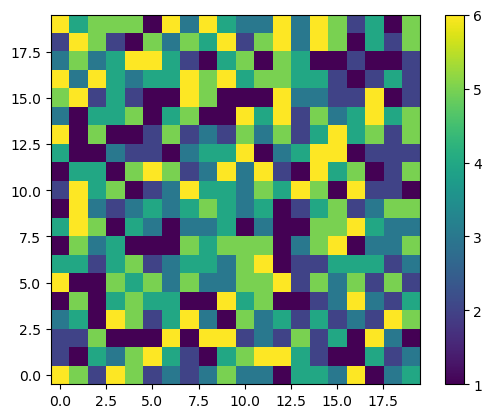

In [10]:
lattice2 = rng.integers(1,max_m+1,(N,N))
plt.imshow(lattice2,origin='lower')
plt.colorbar()

In [11]:
kT2 = 0.1
energy2 = np.zeros(n_trials)
for t in range(n_trials):
    posx = rng.integers(0,N)
    posy = rng.integers(0,N-1)
    dE = lattice2[posx,posy+1]*posy + lattice2[posx,posy]*(posy+1) - (
        lattice2[posx,posy]*posy + lattice2[posx,posy+1]*(posy+1))
    p = np.exp(-dE/kT2)
    if dE<0.0 or rng.random()<p:
        tmp = lattice2[posx,posy+1]
        lattice2[posx,posy+1] = lattice2[posx,posy]
        lattice2[posx,posy] = tmp
    energy2[t] = np.sum(lattice2*yvec)

Text(0.5, 1.0, 'Final distribution for kT=0.1')

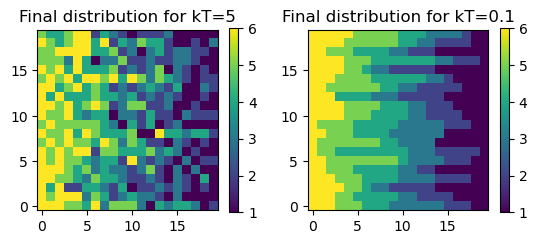

In [13]:
plt.subplot(1,2,1)
plt.imshow(lattice1,origin='lower')
plt.colorbar(shrink=0.5)
plt.title(f'Final distribution for kT={kT1}')
plt.subplot(1,2,2)
plt.imshow(lattice2,origin='lower')
plt.colorbar(shrink=0.5)
plt.title(f'Final distribution for kT={kT2}')

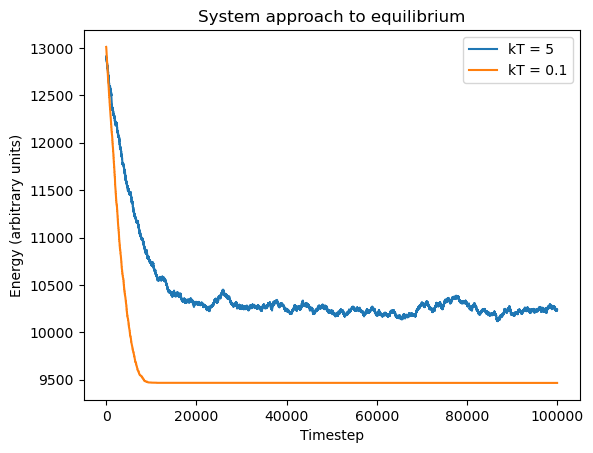

In [16]:
plt.plot(energy1,label=f'kT = {kT1}')
plt.plot(energy2,label=f'kT = {kT2}')
plt.title('System approach to equilibrium')
plt.xlabel('Timestep')
plt.ylabel('Energy (arbitrary units)')
plt.legend()